In [1]:
# 데이터 분석 모듈 준비
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
paths1 = "../data-files/seoul-cctv.xlsx"
paths2 = "../data-files/seoul-crime.xlsx"

# pop_in_seoul_excel = pd.read_excel(paths, header=None)
seoul_cctv_excel = pd.read_excel(paths1, skiprows=2)
seoul_crime_excel = pd.read_excel(paths2)


c:\Users\human\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [11]:
# 데이터 다듬기

# 복사본 생성
seoul_cctv = seoul_cctv_excel.copy()

# 행과 열 제거
seoul_cctv.drop([0,26], axis=0, inplace=True) # inplace=True 원본 삭제
seoul_cctv.drop(seoul_cctv_excel.columns[:2], axis=1, inplace=True)
seoul_cctv.reset_index(drop=True, inplace=True) # 인덱스 초기화 

# 컬럼명 변경
seoul_cctv.rename(columns={ "구분":"자치구"}, inplace=True)
seoul_cctv.rename(columns={ "총 계":"총계"}, inplace=True)
seoul_cctv.rename(columns={ seoul_cctv.columns[2]:"2015년_이하"}, inplace=True) 

seoul_cctv.set_index("자치구", inplace=True)

print(seoul_cctv.info())
print(seoul_cctv.shape)
print(seoul_cctv.head())
seoul_cctv.head()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   총계        25 non-null     float64
 1   2015년_이하  25 non-null     float64
 2   2016년     25 non-null     float64
 3   2017년     25 non-null     float64
 4   2018년     25 non-null     float64
 5   2019년     25 non-null     float64
 6   2020년     25 non-null     float64
 7   2021년     25 non-null     float64
 8   2022년     25 non-null     float64
 9   2023년     25 non-null     float64
 10  2024년     25 non-null     float64
dtypes: float64(11)
memory usage: 2.3+ KB
None
(25, 11)
         총계  2015년_이하  2016년  2017년  2018년  2019년  2020년  2021년  2022년  2023년  \
자치구                                                                             
종로구  2339.0     146.0   76.0  115.0  137.0   68.0  231.0   86.0  234.0  924.0   
중 구  3118.0     356.0  219.0  366.0  385.0  159.0  352.0  416.0  137.0  135.0   
용산구  3609.0 

,총계,2015년_이하,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년
자치구,,,,,,,,,,,
종로구,2339.0,146.0,76.0,115.0,137.0,68.0,231.0,86.0,234.0,924.0,322.0
중 구,3118.0,356.0,219.0,366.0,385.0,159.0,352.0,416.0,137.0,135.0,593.0
용산구,3609.0,24.0,124.0,454.0,119.0,335.0,625.0,431.0,457.0,411.0,629.0
성동구,4638.0,1295.0,228.0,881.0,383.0,477.0,386.0,294.0,170.0,320.0,204.0
광진구,4636.0,247.0,38.0,660.0,465.0,710.0,194.0,744.0,276.0,348.0,954.0


In [10]:
seoul_crime = seoul_crime_excel.copy()
seoul_crime.drop([0,1,2,3], axis=0, inplace=True)
seoul_crime.drop(seoul_crime_excel.columns[:1], axis=1, inplace=True)

# 컬럼명 변경
clms = seoul_crime.columns
crimeList = ["합계", "살인", "강도", "강간", "절도", "폭력"]

seoul_crime.rename(columns={clms[0]:"자치구"}, inplace=True)

i = 1
for j in range(2014,2024):
    for k in crimeList:
        seoul_crime.rename(columns={clms[i]:str(j)+"발생"+k}, inplace=True)
        seoul_crime.rename(columns={clms[i+1]:str(j)+"검거"+k}, inplace=True)
        i += 2

# 인덱스 변경 
seoul_crime.set_index("자치구", inplace=True)

# 형변환
seoul_crime.replace('-', '0',inplace=True)
seoul_crime = seoul_crime.astype(int)


print(seoul_crime.info())
seoul_crime.head()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Columns: 120 entries, 2014발생합계 to 2023검거폭력
dtypes: int64(120)
memory usage: 23.6+ KB
None


,2014발생합계,2014검거합계,2014발생살인,2014검거살인,2014발생강도,2014검거강도,2014발생강간,2014검거강간,2014발생절도,2014검거절도,...,2023발생살인,2023검거살인,2023발생강도,2023검거강도,2023발생강간,2023검거강간,2023발생절도,2023검거절도,2023발생폭력,2023검거폭력
자치구,,,,,,,,,,,,,,,,,,,,,
종로구,5021,4610,3,7,12,15,226,948,2272,1281,...,5,6,5,7,239,1138,1169,953,1563,1381
중구,5231,3188,6,5,13,13,221,161,2576,887,...,3,3,6,5,212,144,1520,864,1607,1449
용산구,3799,2340,1,2,7,7,213,169,1560,522,...,3,4,3,3,245,219,978,561,1792,1481
성동구,3582,2048,1,1,5,6,141,103,1753,529,...,2,1,2,2,119,85,893,472,1007,851
광진구,6268,3531,8,9,16,22,249,199,3167,1001,...,2,2,5,3,238,178,1616,830,1563,1320


In [14]:
seoul_cctv2 = seoul_cctv.iloc[:20].copy()
seoul_crime2 = seoul_crime.copy()

merge_df1 = seoul_cctv2.merge(seoul_crime2, on=["자치구"],
                               how="inner") # 두 데이터프레임에 모두 존재하는 경우만 병합
merge_df2 = seoul_cctv2.merge(seoul_crime2, on=["자치구"],
                               how="right") # 오른쪽 데이터는 모두 표시, 왼쪽은 해당하는 데이터만

merge_df2

,총계,2015년_이하,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,...,2023발생살인,2023검거살인,2023발생강도,2023검거강도,2023발생강간,2023검거강간,2023발생절도,2023검거절도,2023발생폭력,2023검거폭력
자치구,,,,,,,,,,,,,,,,,,,,,
종로구,2339.0,146.0,76.0,115.0,137.0,68.0,231.0,86.0,234.0,924.0,...,5,6,5,7,239,1138,1169,953,1563,1381
중구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,3,6,5,212,144,1520,864,1607,1449
용산구,3609.0,24.0,124.0,454.0,119.0,335.0,625.0,431.0,457.0,411.0,...,3,4,3,3,245,219,978,561,1792,1481
성동구,4638.0,1295.0,228.0,881.0,383.0,477.0,386.0,294.0,170.0,320.0,...,2,1,2,2,119,85,893,472,1007,851
광진구,4636.0,247.0,38.0,660.0,465.0,710.0,194.0,744.0,276.0,348.0,...,2,2,5,3,238,178,1616,830,1563,1320
동대문구,3846.0,0.0,1563.0,136.0,197.0,209.0,223.0,197.0,234.0,509.0,...,5,6,4,3,146,116,1280,847,1522,1329
중랑구,5392.0,541.0,160.0,182.0,209.0,1070.0,992.0,604.0,346.0,433.0,...,6,6,2,2,169,134,1402,786,1745,1546
성북구,4906.0,338.0,394.0,386.0,766.0,667.0,209.0,407.0,363.0,415.0,...,1,1,1,1,141,112,984,683,1284,1161
강북구,3584.0,41.0,195.0,1.0,349.0,938.0,545.0,408.0,652.0,375.0,...,7,7,1,1,141,102,917,730,1431,1302


In [36]:
# CCTV 설치 갯수와 범죄 발생/검거 비교
print(merge_df1.columns[0], merge_df1.columns[-12:-11])

cctv_crime = merge_df1.iloc[:, [0, -12, -11]].copy()

cctv_crime["검거율"] = cctv_crime["2023검거합계"] / cctv_crime["2023발생합계"]
cctv_crime.sort_values("검거율")

총계 Index(['2023발생합계'], dtype='object')


,총계,2023발생합계,2023검거합계,검거율
자치구,,,,
동작구,3664.0,2642,1763,0.667298
광진구,4636.0,3424,2333,0.681367
서대문구,4218.0,2385,1641,0.688050
성동구,4638.0,2023,1411,0.697479
구로구,5694.0,3737,2632,0.704308
양천구,4854.0,3019,2135,0.707188
노원구,4105.0,3567,2607,0.730866
도봉구,2808.0,1921,1406,0.731910
중랑구,5392.0,3324,2474,0.744284


c:\Users\human\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\human\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\human\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\human\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\human\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing fro

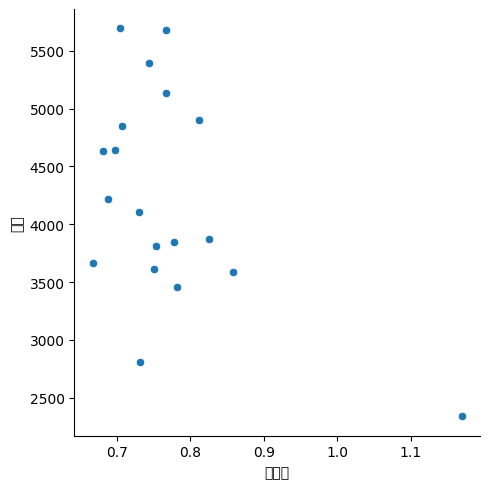

In [37]:
sns.relplot(x="검거율", y="총계", data=cctv_crime)